In [4]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
import json

In [5]:
path="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"

In [4]:
#R = open('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Practica_computacional\mag_papers_166.txt', 'r') 
version=1
paper_conjuntos = []

#Saca el campo del diccionario
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def agregarpaper(R_n,paper_conjuntos):
    paper_conjuntos = []
    
    with open(path+'papers_filtro_'+str(version)+'.txt','a',encoding='utf-8') as archivo_guardar:
            
        R = open(path+'\mag_papers_'+R_n+'.txt', 'r') 
        N = 1000000
        i = 0
        for line in R:
            paper=ast.literal_eval(line)
            try:
                paper['doc_type']
                paper['fos']
                paper['keywords']
                paper['references']
                paper['venue']
                if paper['doc_type']=='Journal' and paper['lang']=='en':
                    paper_conjuntos.append(paper)
                    key='abstract';sacarcampo(paper,key)
                    key='url';sacarcampo(paper,key)
                    key='lang';sacarcampo(paper,key)
                    key='page_start';sacarcampo(paper,key)
                    key='page_end';sacarcampo(paper,key)
                    key='doc_type';sacarcampo(paper,key)
                    key='pdf';sacarcampo(paper,key)
                    json.dump(paper, archivo_guardar, ensure_ascii=False)
                    archivo_guardar.write('\n')
            except KeyError:
                pass
            i+=1
            if i==N:
                break
        R.close()
    archivo_guardar.close()
    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    paper_conjuntos=agregarpaper(R_n,paper_conjuntos)
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
ides_out=[]
ides_in={}
for i in range(160,167):
    ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),[])
    print(i)
    
#ides_in,ides_out=agregar_contar(ides_in,ides_out,str(162),[])

160
161
162
163
164
165
166


In [5]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
print(len(interseccion))

190492


In [6]:
len(ides_in)

10010600

In [5]:
interseccion_archivo = open(path+'papers_interseccion'+str(version)+'.txt','a',encoding='utf-8') 
for i in interseccion:
    interseccion_archivo.write(i+'\n')
interseccion_archivo.close()

In [7]:
version = 1
#interseccion = open(path+'papers_interseccion'+str(version-1)+'.txt','r')
#interseccion.close()
#version=str(version)
def filtrar_paper(G,interseccion):
    i=0
    paper_conjuntos = []
    #R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+version+'.txt','r') 
    R = open(path+"papers_filtro_"+str(version)+".txt","r",encoding="utf-8") 
    archivo_red= open(path+"archivo_red_"+str(version)+".txt","a",encoding="utf-8")
    archivo_year = open(path+'archivo_year_'+str(version)+'.txt','a',encoding='utf-8')
    archivo_venue = open(path+'archivo_venue_'+str(version)+'.txt','a',encoding='utf-8')
    archivo_fos = open(path+'archivo_fos_'+str(version)+'.txt','a',encoding='utf-8')
    archivo_keywords = open(path+'archivo_keywords_'+str(version)+'.txt','a',encoding='utf-8')
    archivo_name = open(path+'archivo_name_'+str(version)+'.txt','a',encoding='utf-8')
    archivo_org = open(path+'archivo_org_'+str(version)+'.txt','a',encoding='utf-8')
    for line in R:
        try:
            paper=ast.literal_eval(line)
        except:
            i+=1
        if paper['id'] in interseccion:
            pass
            archivo_year.write(str(paper['id'])+' '+str(paper['year'])+'\n')
            archivo_fos.write(str(paper['id'])+' '+str(paper['fos'])+'\n')
            archivo_venue.write(str(paper['id'])+' '+str(paper['venue'])+'\n')
            try:
                archivo_keywords.write(paper['id']+' '+str(paper['keywords'])+'\n')
            except KeyError:
                pass
            try:
                archivo_name.write(paper['id']+' '+paper['authors'][0]['name']+'\n')
            except KeyError:
                pass
            try:
                archivo_org.write(paper['id']+' '+paper['authors'][0]['org']+'\n')
            except KeyError:
                pass
            
            for cita in paper['references']:
                if cita in interseccion:
                   # pass
                    G.add_edge(paper['id'],cita)  
                    archivo_red.write((paper['id'])+' '+cita+'\n')
    R.close()
    archivo_red.close()
    archivo_year.close()
    archivo_venue.close()
    archivo_fos.close()
    archivo_keywords.close()
    archivo_name.close()
    archivo_org.close()
    print(i)
    return(G)

G=nx.DiGraph()
G=filtrar_paper(G,interseccion)

0


In [5]:
interseccion

<_io.TextIOWrapper name='D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\papers_interseccion1.txt' mode='r' encoding='cp1252'>

In [14]:
R = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_12.txt','r',encoding='utf-8')
i=0
for paper in R:
    i+=1
    if line==paper:
        break
R.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_12.txt'

In [8]:
i
len(G)

117650

AttributeError: 'DiDegreeView' object has no attribute 'values'

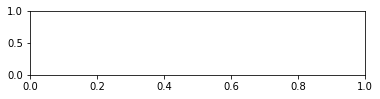

In [50]:
# Distribución de grado
plt.subplot(311)
grados_G = [gra for gra in G.degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.subplot(312)
# Distribución de grado IN
grados_G = [gra for gra in G.in_degree().values()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.subplot(313)
# Distribución de grado OUT
grados_G = [gra for gra in G.out_degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

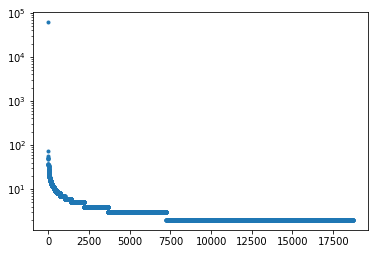

In [9]:
GG=G.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))
largo=[]
for i in Componentes:
    largo.append(len(i))

plt.semilogy(largo,'.')

SyntaxError: invalid syntax (<ipython-input-47-1d119f7b6363>, line 1)

In [52]:
prueba_red=Componente_INT[0]

campos_list=[]

for paper in prueba_red:
    campos_list.append(G.node[paper]['campo'])
    
    

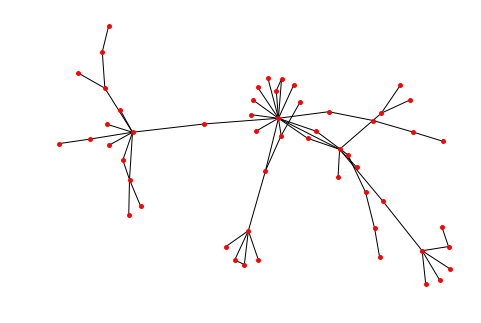

In [17]:
M=1

options = {
'node_size': 15,
'width': 1,
}

for i in Componentes[2:3]:
    print(i)
    nx.draw_spring(i,node_color = color_map, **options)
    plt.show()
    

In [12]:
len(Componentes[1])

75

In [13]:
# Distribución de grado
grados_G = [gra for gra in Componentes[0].degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()

AttributeError: 'DegreeView' object has no attribute 'values'

In [3]:
version=1
paper_conjuntos = []
    
R=open(path+'papers_filtro_'+str(version)+'.txt','r',encoding='utf-8') 
N = 10000000
i = 0
j = 0
k = 0
for line in R:
    try:
        paper=ast.literal_eval(line)
        paper_conjuntos.append(paper)
        j+=1
    except:
        k+=1
    i+=1
    if i==N:
        break
R.close()
print(j)
print(k)

745114
0


In [4]:
#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador_2(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in,ides_out)

In [5]:
ides_out=[]
ides_in={}
ides_in,ides_out=contador_2(ides_in,ides_out,paper_conjuntos)

In [6]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
print(len(interseccion))

190492


In [3]:
# Esta rutina establece una lista de frecuencias para cada uno de los campos de estudio.

archivo = open(path+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
N=1000000
i=0
j=0
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

NameError: name 'path' is not defined

In [10]:
version=1
archivo = open(path+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
N=1000000
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

In [11]:
version=1
archivo = open(path+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    freq=np.zeros(len(a))
    try:
        for k in range(len(a)):
            freq[k]=fos[a[k]]
        key=a[np.argmax(freq)]    
        G.node[line.split()[0]]['campo']=key
        j+=1
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

NameError: name 'G' is not defined

In [60]:
def frequency(Lista):
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

In [63]:
grupo={}
x=frequency(campos_list)

In [2]:
sorted_by_value = sorted(x.items(), key=lambda kv: kv[1],reverse=True)

NameError: name 'x' is not defined

In [1]:
for i in range(len(sorted_by_value)):
    print(sorted_by_value[i][0])

NameError: name 'sorted_by_value' is not defined

In [75]:
#cmap=plt.cm.rainbow

In [80]:
import matplotlib.cm as cm
cmap = cm.rainbow(np.linspace(0.0, 1.0, len(sorted_by_value)))

In [ ]:
keys=sorted_by_value.key
conversion={}
for i in range(len(sorted_by_values)):
    conversion.update({keys[i]: cmap[i]})

In [ ]:
options = {
'node_size': 15,
'width': 1,
}

for i in Componentes[2:3]:
    print(i)
    nx.draw_spring(i,node_color = color_map, **options)
    plt.show()

La idea acá es muy simple. todo lo que tenemos que hacer es determinar qué cantidad de etiquetas distintas existen en los elementos de la red. Luego hay que crear el mapa de color para el número dado de etiquetas y, finalmente, asignar a cada etiqueta un color.

La unica cosa que queda por hacer es a cada key asociarle un color y luego asignarle a cada nodo un color en función de su key. De esa manera queda univocamente elaborado el mapa de color que va en nx.draw.